In [2]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [3]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [4]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [5]:
import torch

In [6]:
x = torch.arange(4.0)

In [7]:
x

tensor([0., 1., 2., 3.])

In [8]:
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [9]:
y = 2 * torch.dot(x, x)


In [10]:
y

tensor(28., grad_fn=<MulBackward0>)

In [11]:
y.backward()

In [12]:
x.grad

tensor([ 0.,  4.,  8., 12.])

In [13]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [14]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [15]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [16]:
x.grad

tensor([0., 1., 4., 9.])

In [17]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [18]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [19]:
a = torch.randn(size=(), requires_grad = True)

In [20]:
a

tensor(-0.6006, requires_grad=True)

In [21]:
d = f(a)

In [22]:
d

tensor(-123001.1953, grad_fn=<MulBackward0>)

In [23]:
d.backward()

In [24]:
a.grad

tensor(204800.)

In [25]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [26]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [49, 51]


In [28]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([52., 48.])

In [29]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5800, 0.4200])

In [32]:
counts = Multinomial(1000000, fair_probs).sample()
counts / 1000000

tensor([0.5001, 0.4999])

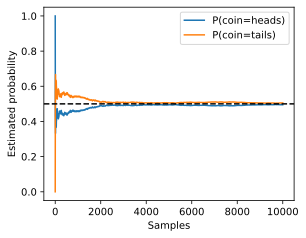

In [33]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();